In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
df = pd.read_csv('/content/Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [17]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [18]:
df.shape

(101, 18)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [20]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [22]:
data_all = pd.concat([pd.DataFrame(X), pd.Series(y, name='target')], axis=1)

In [23]:
Q1 = data_all.quantile(0.25)
Q3 = data_all.quantile(0.75)
IQR = Q3 - Q1

In [24]:
data_clean = data_all[~((data_all < (Q1 - 1.5 * IQR)) | (data_all > (Q3 + 1.5 * IQR))).any(axis=1)]


In [25]:
X_clean = data_clean.drop('target', axis=1).values
y_clean = data_clean['target'].values

In [26]:
print(f"Removed {len(data_all) - len(data_clean)} outliers (remaining: {len(data_clean)})")


Removed 68 outliers (remaining: 33)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           5       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7


Confusion Matrix:
 [[6 0]
 [1 0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
if X_train.shape[1] > 2:
    print("\nDataset has more than 2 features — applying PCA for visualization.")
    pca = PCA(n_components=2)
    X_vis = pca.fit_transform(X_train)
else:
    X_vis = X_train

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_train)


Dataset has more than 2 features — applying PCA for visualization.


KNeighborsClassifier()

In [33]:
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),np.arange(y_min, y_max, 0.05))

In [34]:
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

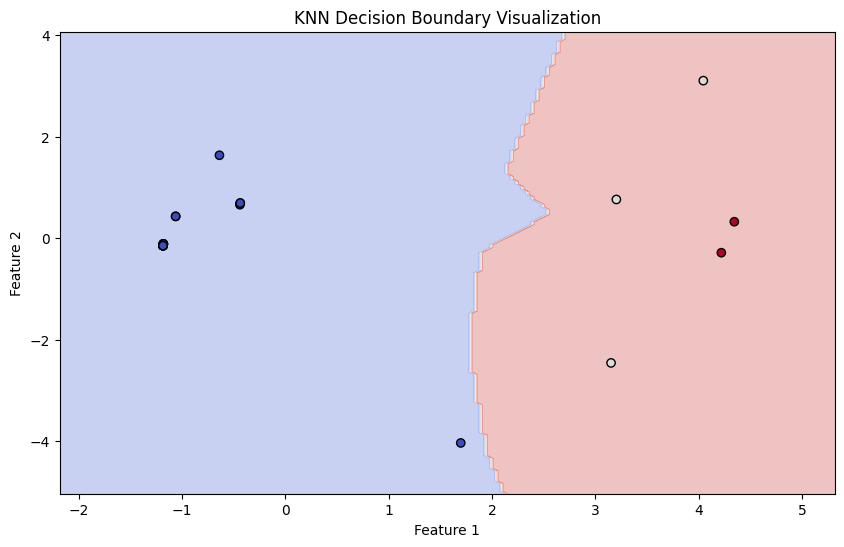

In [35]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, edgecolors='k', cmap='coolwarm')
plt.title("KNN Decision Boundary Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

/tmp/ipython-input-4278748915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


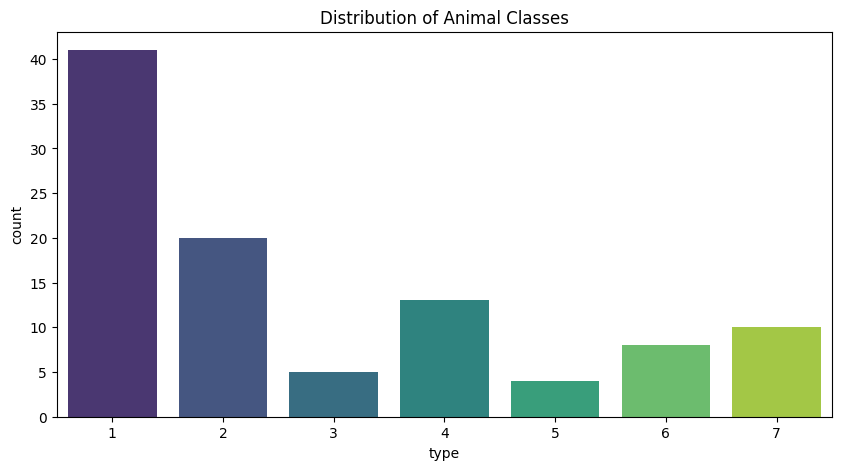

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Distribution of Animal Classes')
plt.show()

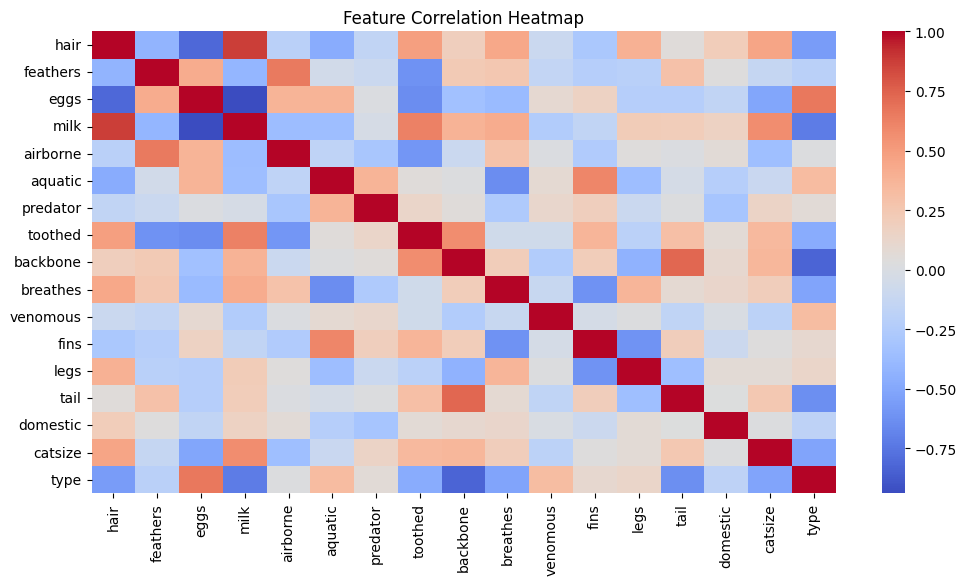

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(df.drop('animal name', axis=1).corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [38]:
if 'animal name' in df.columns:
    df = df.drop(columns=['animal name'])
X = df.drop('type', axis=1)
y = df['type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42, stratify=y)
print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (80, 16)
Testing Set Shape: (21, 16)


In [39]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [40]:
y_pred = knn.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

1.0

In [42]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00         8\n           2       1.00      1.00      1.00         4\n           3       1.00      1.00      1.00         1\n           4       1.00      1.00      1.00         3\n           5       1.00      1.00      1.00         1\n           6       1.00      1.00      1.00         2\n           7       1.00      1.00      1.00         2\n\n    accuracy                           1.00        21\n   macro avg       1.00      1.00      1.00        21\nweighted avg       1.00      1.00      1.00        21\n'

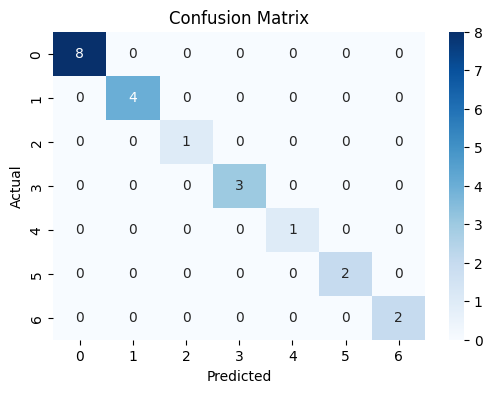

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [44]:
accuracy_scores = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred_i))


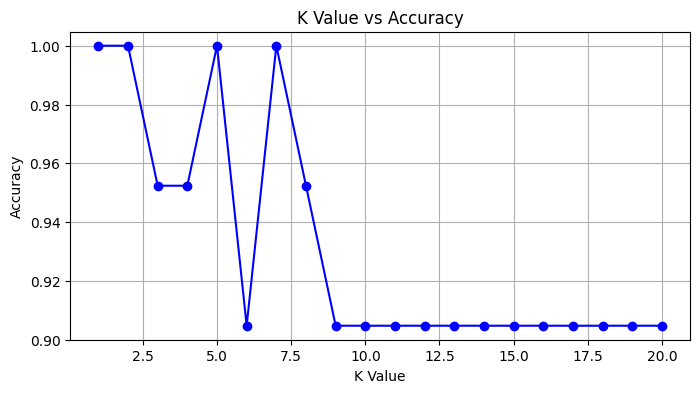

In [45]:
plt.figure(figsize=(8,4))
plt.plot(range(1, 21), accuracy_scores, color='blue', marker='o')
plt.title('K Value vs Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [46]:
print(f"\nBest K Value: {np.argmax(accuracy_scores)+1} with Accuracy = {max(accuracy_scores):.2f}")


Best K Value: 1 with Accuracy = 1.00


What are the key hyperparameters in KNN?

n_neighbors (K) – Number of nearest neighbors to consider when classifying a new point.

metric – The distance measure used (e.g., Euclidean, Manhattan).

weights – How neighbors contribute to the prediction (uniform = all equal, distance = closer neighbors have more influence).

algorithm – Method used to compute nearest neighbors (e.g., auto, ball_tree, kd_tree, brute).

What distance metrics can be used in KNN?

Euclidean Distance – Most common; measures straight-line distance.

Manhattan Distance – Based on grid-like path (sum of absolute differences).

Minkowski Distance – Generalized version of Euclidean/Manhattan.

Cosine Distance – Measures angle between vectors (useful for text or high-dimensional data).

Hamming Distance – For categorical or binary features.